In [15]:
import os 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

from src.data_exploration import *
from src.visualization import *

PATH_TO_GOLDMAN_DATA = "data/LemmaSplitting/LemmaSplitData"
PATH_TO_SIGMORPHON20 = "data/SIGMORPHON2020/train"
PATH_TO_SIGMORPHON22 = "data/2022InflectionST/part1/development_languages"

# SIGMORPHON Train Sizes in 2020 vs. 2022

Here we examine the average training sizes for the 2020 and 2022 shared tasks, and find the number of shared languages between the two. 
We also plot the distribution of training sizes in 2020 and 2022 for comparison.

Mean train size in 2020: 17488.933 (stdev: 26035.04482628495)
Mean train size in 2022: 4452.939 (stdev: 3162.846837508738)
7 shared langages of 33 in 2022 and 90 in 2020
Shared languages:
	vep
	gml
	krl
	lud
	kaz
	ang
	evn
T-test:	 2.845 (p: 0.0052140126541749205)


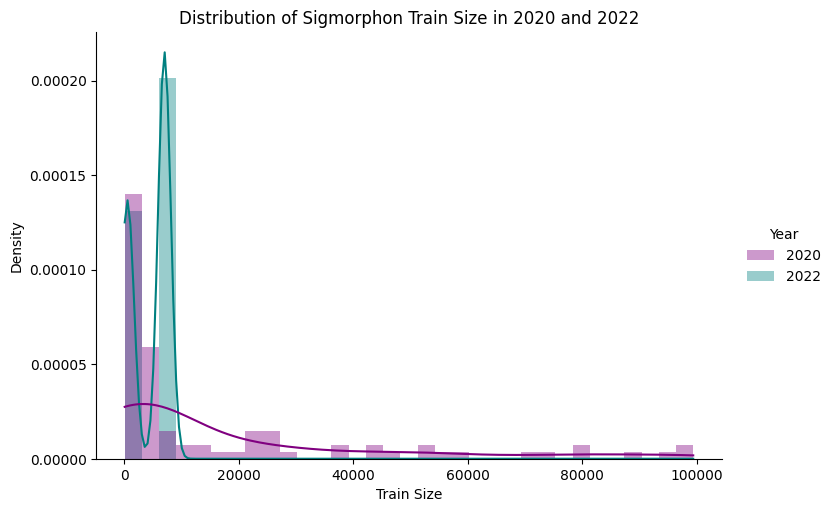

In [25]:
# Get the training sizes for SIGMORPHON 2020
lang_to_train20 = {}
for f in [f for f in os.listdir(PATH_TO_SIGMORPHON20) if "." not in f]:
    for lang in [l for l in os.listdir(f"{PATH_TO_SIGMORPHON20}/{f}") if ".trn" in l]:
        lang_to_train20[lang.split(".")[0]] = len(open(f"{PATH_TO_SIGMORPHON20}/{f}/{lang}").readlines())
        
lens20 = np.asarray(list(lang_to_train20.values()))
print(f"Mean train size in 2020: {np.mean(lens20) :.3f} (stdev: {np.std(lens20)})")

# Get the training sizes for SIGMORPHON 2022: there were large train files only for some languages so check for each
lang_to_train22 = {}
sigmorphon_22_files = [f for f in os.listdir(PATH_TO_SIGMORPHON22) if "train" in f]
langs = set([x.split("_")[0] for x in sigmorphon_22_files])
for lang in langs:
    if f"{lang}_large.train" in sigmorphon_22_files:
        file = f"{lang}_large"
    else:
        file = f"{lang}_small"
    lang_to_train22[lang] = len(open(f"{PATH_TO_SIGMORPHON22}/{file}.train").readlines())
    
lens22 =  np.asarray(list(lang_to_train22.values()))
print(f"Mean train size in 2022: {np.mean(lens22) :.3f} (stdev: {np.std(lens22)})")

# Find the number of shared languages between the years & print them out 
shared = [x for x in lang_to_train22 if x in lang_to_train20]
print(f"{len(shared)} shared langages of {len(lens22)} in 2022 and {len(lens20)} in 2020")
print(f"Shared languages:")
for lang in shared:
    print(f"\t{lang}")

# Create a dataframe with the training sizes and years 
df = pd.DataFrame({"Year": ["2020"] * len(lang_to_train20) + ["2022"] * len(lang_to_train22), 
                   "Train Size": list(lang_to_train20.values()) + list(lang_to_train22.values())}
                 )

# Run an unpaired t-test & calculate means and standard deviations
ttest = stats.ttest_ind(list(lang_to_train20.values()), list(lang_to_train22.values()))
print(f"T-test:\t {ttest.statistic :.3f} (p: {ttest.pvalue})")


# Plot the distribution of training sizes
sns.displot(df, 
            palette=["purple", "teal"], 
            linewidth=0, 
            alpha=0.4, 
            x="Train Size", 
            hue="Year", 
            kde=True, 
            kde_kws={"bw_adjust": 3.5, "bw_method": 0.1}, 
            binwidth=3000, 
            common_norm=False, 
            stat="density",
            aspect=1.5
           )
plt.title("Distribution of Sigmorphon Train Size in 2020 and 2022")
plt.savefig("../writeup/figs/training_size.png", dpi=500, bbox_inches='tight')

# Goldman et al. Train vs. SIGMORPHON 2020 Train Sampling 

The following plots the distribution of the percent decrease in training size and the number of training lemmas between the SIGMORPHON 2020 and Goldman et al. 2022 training data.

Mean: -3.499
Standard deviation: 6.341


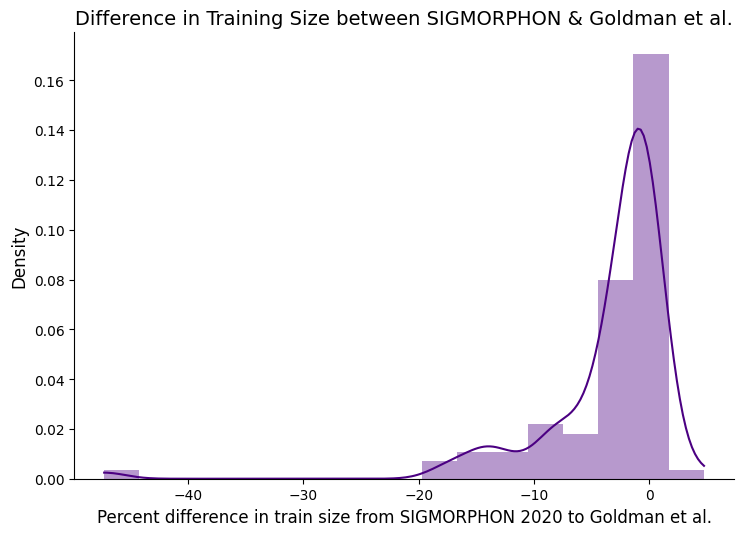

In [2]:
# Training size 
difference_density(PATH_TO_GOLDMAN_DATA, PATH_TO_SIGMORPHON20, False)

Mean: -28.846
Standard deviation: 5.221


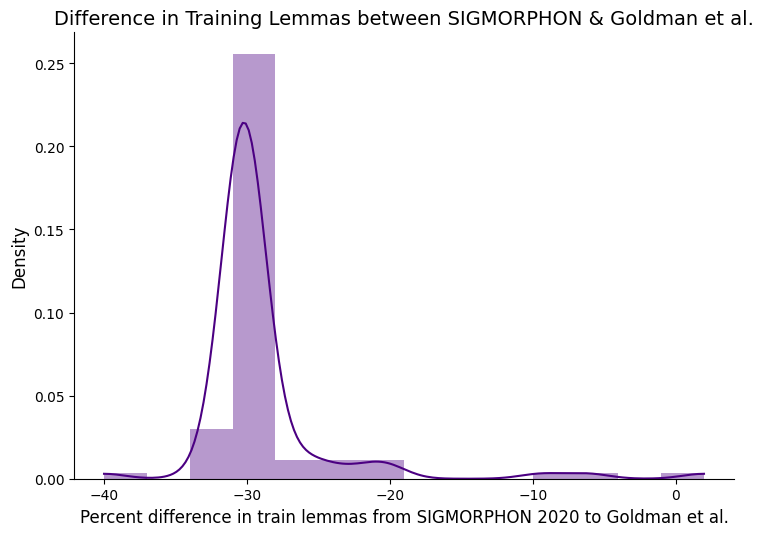

In [3]:
# Number of lemmas in train
difference_density(PATH_TO_GOLDMAN_DATA, PATH_TO_SIGMORPHON20, True)

In [42]:
threshold = 15000

family_counts = {}

for f in [f for f in os.listdir(PATH_TO_SIGMORPHON20) if "." not in f]:
    family_counts[f] = []
    for lang in set([l.strip().split(".")[0] for l in os.listdir(f"{PATH_TO_SIGMORPHON20}/{f}")]):
        train, dev, test = parse_files(f"{PATH_TO_SIGMORPHON20}/{f}/{lang}")
        size = len(train) + len(dev) + len(test)
        if size >= threshold:  
            family_counts[f].append(lang)

for k, v in family_counts.items():
    print(f"{k}:\t{len(v)}")
print(f"{sum([len(x) for x in family_counts.values()])} languages total")
print(f"{len([x for x in family_counts.values() if len(x) >0])} families total")

Iranian:	1
Sino-Tibetan:	0
Afro-Asiatic:	0
Romance:	4
oto-manguean:	2
Australian:	0
Indo-Aryan:	2
austronesian:	0
Algic:	0
Siouan:	0
Tungusic:	0
Turkic:	2
Dravidian:	0
Germanic:	8
Niger-Congo:	0
Uto-Aztecan:	0
Uralic:	11
Nilo-Sahan:	0
30 languages total
7 families total


In [ ]:
family_counts = {}

sigmorphon_22_files = [f for f in os.listdir(PATH_TO_SIGMORPHON22) if "train" in f]
langs = set([x.split("_")[0] for x in sigmorphon_22_files])
for lang in langs:
    if f"{lang}_large.train" in sigmorphon_22_files:
        file = f"{lang}_large"
    else:
        file = f"{lang}_small"
    lang_to_train22[lang] = len(open(f"{PATH_TO_SIGMORPHON22}/{file}.train").readlines())